# Exploratory Data analysis of Employees dataset



In [16]:
#Loading the libraries
import pandas as pd
import numpy as np
# Read dataset using pandas
df = pd.read_csv(r"C:\Users\excel\Downloads\employees.csv")
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,03-04-2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [17]:
df.dtypes

First Name            object
Gender                object
Start Date            object
Last Login Time       object
Salary                 int64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

In [2]:
# last five rows of data
df.tail()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development
999,Albert,Male,5/15/2012,6:24 PM,129949,10.169,True,Sales


In [3]:
# columns information 
df.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [4]:
# number of rows and columns
df.shape

(1000, 8)

In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [6]:
df['Start Date']

0      08-06-1993
1       3/31/1996
2       4/23/1993
3      03-04-2005
4       1/24/1998
          ...    
995    11/23/2014
996     1/31/1984
997     5/20/2013
998     4/20/2013
999     5/15/2012
Name: Start Date, Length: 1000, dtype: object

In [7]:
# convert "Start Date" column to datetime data type
df['Start Date'] = pd.to_datetime(df['Start Date'], format='mixed') # '%d/%m/%Y'

In [8]:
df['Start Date']

0     1993-08-06
1     1996-03-31
2     1993-04-23
3     2005-03-04
4     1998-01-24
         ...    
995   2014-11-23
996   1984-01-31
997   2013-05-20
998   2013-04-20
999   2012-05-15
Name: Start Date, Length: 1000, dtype: datetime64[ns]

In [9]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services


In [10]:
df['First Name'] = df['First Name'].astype('string') 

In [12]:
df['First Name'].head()

0    Douglas
1     Thomas
2      Maria
3      Jerry
4      Larry
Name: First Name, dtype: string

In [11]:
# docs of astype function.
help(pd.Series.astype)

Help on function astype in module pandas.core.generic:

astype(self: 'NDFrameT', dtype, copy: 'bool_t | None' = None, errors: 'IgnoreRaise' = 'raise') -> 'NDFrameT'
    Cast a pandas object to a specified dtype ``dtype``.
    
    Parameters
    ----------
    dtype : str, data type, Series or Mapping of column name -> data type
        Use a str, numpy.dtype, pandas.ExtensionDtype or Python type to
        cast entire pandas object to the same type. Alternatively, use a
        mapping, e.g. {col: dtype, ...}, where col is a column label and dtype is
        a numpy.dtype or Python type to cast one or more of the DataFrame's
        columns to column-specific types.
    copy : bool, default True
        Return a copy when ``copy=True`` (be very careful setting
        ``copy=False`` as changes to values then may propagate to other
        pandas objects).
    errors : {'raise', 'ignore'}, default 'raise'
        Control raising of exceptions on invalid data for provided dtype.
    
  

In [13]:
df['Gender'] = df['Gender'].astype('string') 
df['Senior Management'] = df['Senior Management'].astype('bool') 
df['Team'] = df['Team'].astype('string') 

In [14]:
# data type for single column
df['Gender'].dtype

string[python]

In [15]:
# data type for multiple column
df.dtypes

First Name           string[python]
Gender               string[python]
Start Date           datetime64[ns]
Last Login Time              object
Salary                        int64
Bonus %                     float64
Senior Management              bool
Team                 string[python]
dtype: object

In [18]:
# renameing the columns
columns = {'First Name':'First_Name', 
           'Start Date':'Start_date', 
           'Last Login Time':'Last_Login_Time', 
            'Bonus %':'Bonus_perct', 
           'Senior Management':'Senior_Management'}
df.rename(columns = columns, inplace=True)

In [19]:
df.columns

Index(['First_Name', 'Gender', 'Start_date', 'Last_Login_Time', 'Salary',
       'Bonus_perct', 'Senior_Management', 'Team'],
      dtype='object')

In [20]:
df.head(3)

,First_Name,Gender,Start_date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance


In [ ]:
# df.drop('start data',axis = 1)

In [21]:
# checking for uniques values in every column
df.nunique()

First_Name           200
Gender                 2
Start_date           972
Last_Login_Time      720
Salary               995
Bonus_perct          971
Senior_Management      2
Team                  10
dtype: int64

In [22]:
# checking for unique value count in a column.
df['Gender'].value_counts()

Gender
Female    431
Male      424
Name: count, dtype: int64

In [23]:
df['Senior_Management'].value_counts()

Senior_Management
True     468
False    465
Name: count, dtype: int64

In [24]:
df['Team'].value_counts()

Team
Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: count, dtype: int64

# Handling Missing Values:
    
isnull() # checking for missing values
notnull()# checking for  values
dropna() # deleting a missing values
fillna() # filling a missing value by other value
bfill() # backward filling
ffill() # forward filling value
replace() #  replacing inplace of missing data.
interpolate() # predicting the value for missing value.

In [27]:
df.isnull().sum(), df.isna().sum()

(First_Name            67
 Gender               145
 Start_date             0
 Last_Login_Time        0
 Salary                 0
 Bonus_perct            0
 Senior_Management     67
 Team                  43
 dtype: int64,
 First_Name            67
 Gender               145
 Start_date             0
 Last_Login_Time        0
 Salary                 0
 Bonus_perct            0
 Senior_Management     67
 Team                  43
 dtype: int64)

In [28]:
df["Gender"].fillna("No Gender", inplace = True)

In [30]:
df["Gender"]

0           Male
1           Male
2         Female
3           Male
4           Male
         ...    
995    No Gender
996         Male
997         Male
998         Male
999         Male
Name: Gender, Length: 1000, dtype: object

In [31]:
df['Senior_Management'].value_counts()

Senior_Management
True     468
False    465
Name: count, dtype: int64

In [40]:
df['Senior_Management'].mode()[0]

True

In [37]:
mode = df['Senior_Management'].mode()[0]
df['Senior_Management'] = df['Senior_Management'].replace(np.nan, mode)

In [38]:
df.isnull().sum()

First_Name           67
Gender                0
Start_date            0
Last_Login_Time       0
Salary                0
Bonus_perct           0
Senior_Management     0
Team                 43
dtype: int64

In [41]:
df = df.dropna(axis = 0, how ='any') # axis = 0 --> rowise, Axis =1 --> columns wise

In [44]:
df.isnull().sum()

First_Name           0
Gender               0
Start_date           0
Last_Login_Time      0
Salary               0
Bonus_perct          0
Senior_Management    0
Team                 0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First_Name         899 non-null    object 
 1   Gender             899 non-null    object 
 2   Start_date         899 non-null    object 
 3   Last_Login_Time    899 non-null    object 
 4   Salary             899 non-null    int64  
 5   Bonus_perct        899 non-null    float64
 6   Senior_Management  899 non-null    bool   
 7   Team               899 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 57.1+ KB


In [46]:
df = df.reset_index()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              899 non-null    int64  
 1   First_Name         899 non-null    object 
 2   Gender             899 non-null    object 
 3   Start_date         899 non-null    object 
 4   Last_Login_Time    899 non-null    object 
 5   Salary             899 non-null    int64  
 6   Bonus_perct        899 non-null    float64
 7   Senior_Management  899 non-null    bool   
 8   Team               899 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 57.2+ KB


In [48]:
df

,index,First_Name,Gender,Start_date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team
0,0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
2,3,Jerry,Male,03-04-2005,1:00 PM,138705,9.340,True,Finance
3,4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
4,5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...,...
894,995,Henry,No Gender,11/23/2014,6:09 AM,132483,16.655,False,Distribution
895,996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
896,997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
897,998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [49]:
# dropping index column
df.drop(['index'],axis = 1,inplace = True)

In [50]:
df.head()

,First_Name,Gender,Start_date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
2,Jerry,Male,03-04-2005,1:00 PM,138705,9.340,True,Finance
3,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
4,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal


In [51]:
# creating new column.
df['Final_salary'] =round(df['Salary'] + ((df['Salary'] * df['Bonus_perct'])/100),2)
df['Final_salary']

0      104066.04
1      146075.36
2      151660.05
3      102406.95
4      126823.25
         ...    
894    154548.04
895     50732.63
896     98291.15
897     67750.92
898    143163.51
Name: Final_salary, Length: 899, dtype: float64

In [52]:
df

,First_Name,Gender,Start_date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team,Final_salary
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing,104066.04
1,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance,146075.36
2,Jerry,Male,03-04-2005,1:00 PM,138705,9.340,True,Finance,151660.05
3,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services,102406.95
4,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal,126823.25
...,...,...,...,...,...,...,...,...,...
894,Henry,No Gender,11/23/2014,6:09 AM,132483,16.655,False,Distribution,154548.04
895,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance,50732.63
896,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product,98291.15
897,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development,67750.92


# outlier detection

In [55]:
Q1_salary = np.quantile(df['Salary'],0.25)
Q2_salary = np.quantile(df['Salary'],0.50)
Q3_salary = np.quantile(df['Salary'],0.75)
print('min: ',df['Salary'].min(),'Q1:',Q1_salary,'Q2:',Q2_salary,'Q3:',Q3_salary,'max: ',df['Salary'].max(),)

min:  35013 Q1: 62412.5 Q2: 90730.0 Q3: 118107.5 max:  149908


In [56]:
IQR = (Q3_salary - Q1_salary)/2
print("IQR: ", IQR)
Upper = Q3_salary+1.5*IQR
lower =  Q1_salary-1.5*IQR  
[lower,Upper]

IQR:  27847.5


[20641.25, 159878.75]

In [57]:
df['Final_salary'].min(),df['Final_salary'].max()

(36858.93, 178258.6)

# Data visualization
Data Visualization is the process of analyzing data in the form of graphs or maps, making it a lot easier to understand the trends or patterns in the data.

Matplotlib 
Python Seaborn 

In [58]:
import warnings
warnings.filterwarnings('ignore')

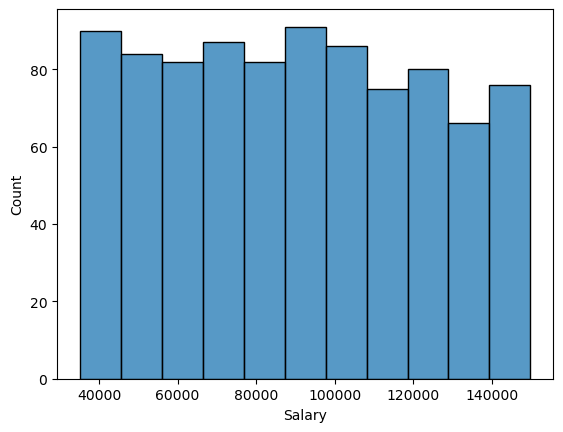

In [59]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Salary', data=df )
plt.show()

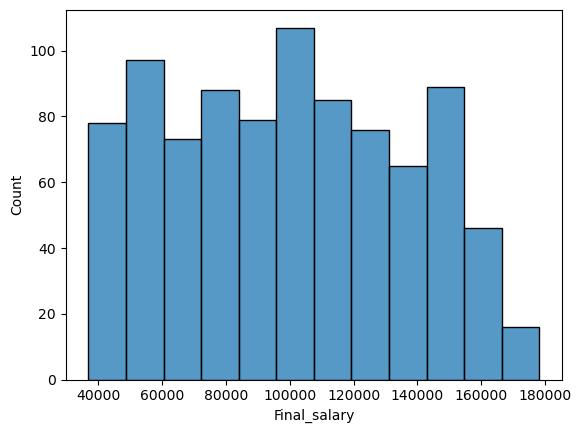

In [60]:
sns.histplot(x='Final_salary', data=df )
plt.show()

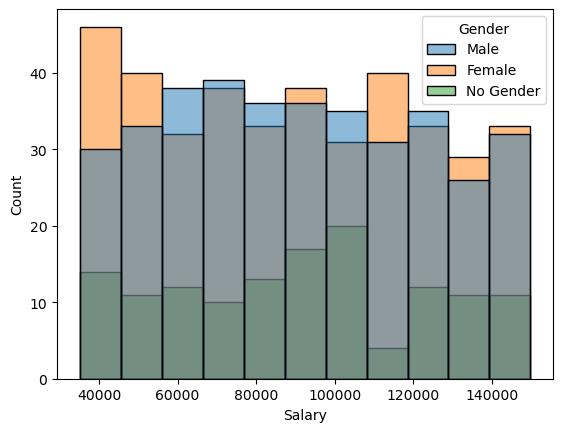

In [61]:
sns.histplot(x='Salary', hue = 'Gender',data=df )
plt.show()

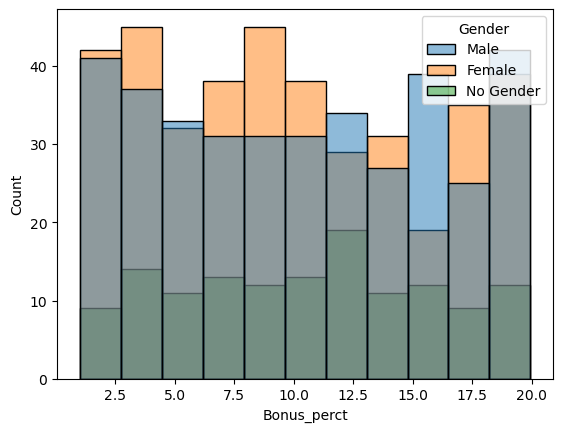

In [62]:
sns.histplot(x = 'Bonus_perct',hue = 'Gender',data = df)
plt.show()

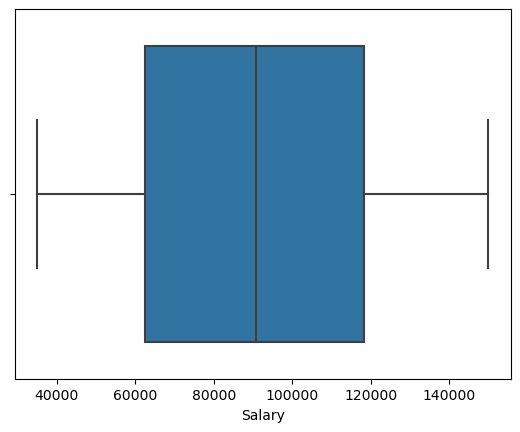

In [54]:
sns.boxplot(x="Salary", data=df )
plt.show()

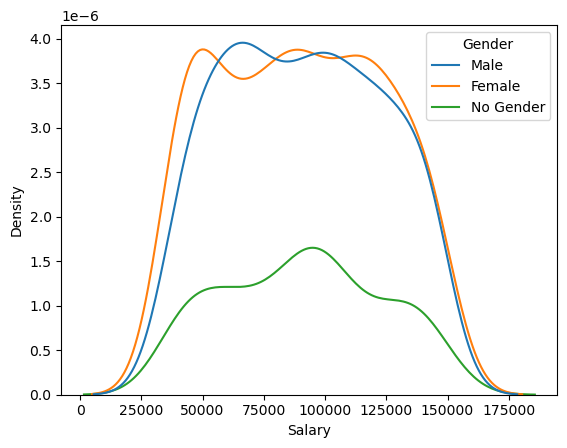

In [64]:
sns.kdeplot(x="Salary", hue = 'Gender',data=df )
plt.show()

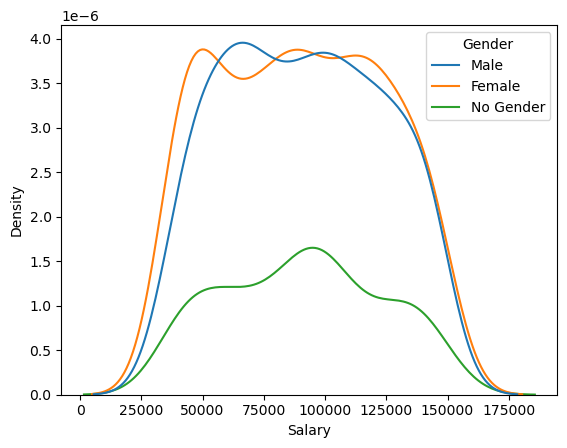

In [57]:
sns.kdeplot(x="Salary", hue='Gender', data=df )
plt.show()

# Relationship of variables

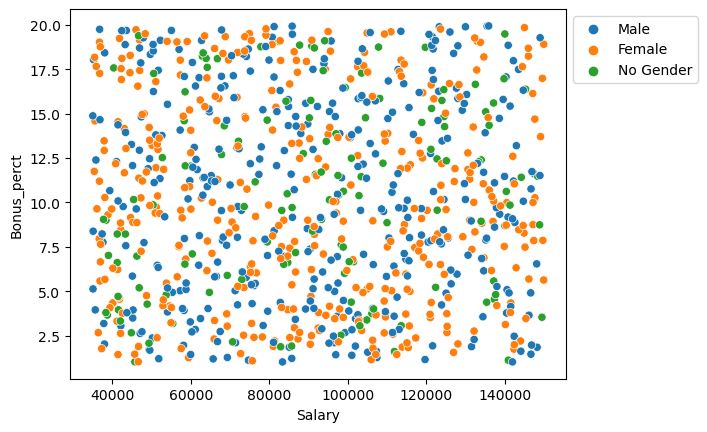

In [58]:
# Relationship of variables
sns.scatterplot(x="Salary", y='Bonus_perct', data=df,hue = 'Gender')
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [59]:
df['Salary'].corr(df['Bonus_perct'])

-0.01702025486966284

In [76]:
bonus19 = df[df['Bonus_perct']>19].sort_values(['Start_date'])

In [90]:
df2 = bonus19[['Start_date','Bonus_perct']]
df2.set_index(['Start_date'],inplace = True)

In [91]:
df2 = df2.resample('Y')

In [96]:
df2

In [94]:
sns.lineplot('Bonus_perct', data=df2)

TypeError: lineplot() got multiple values for argument 'data'

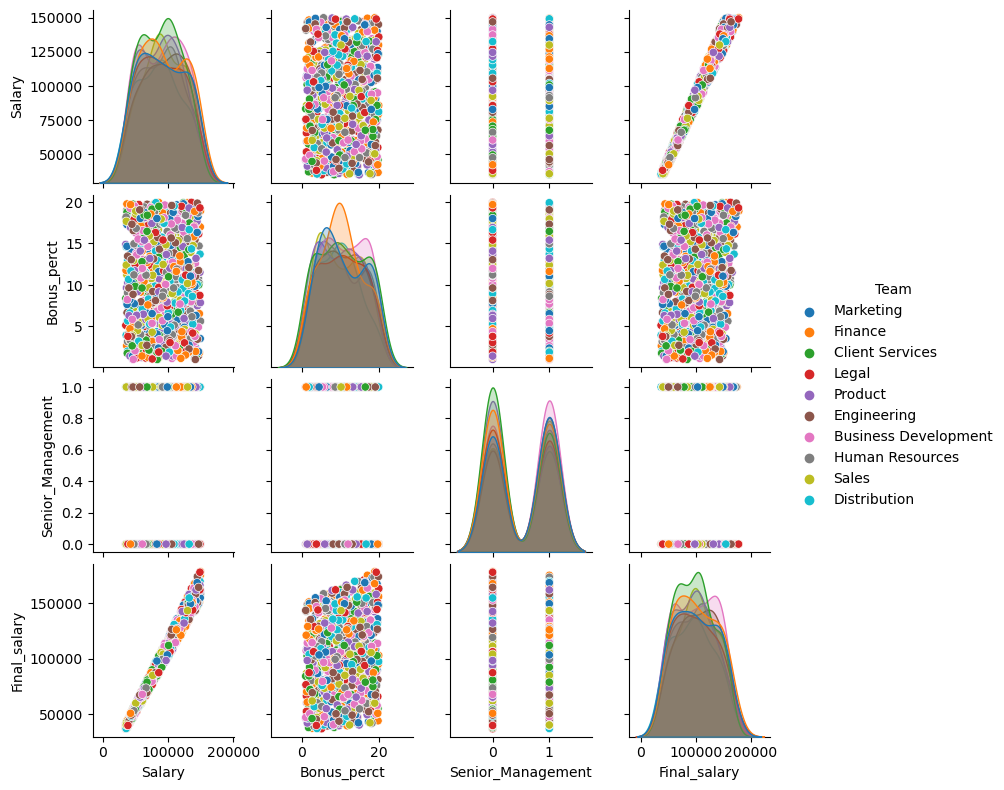

In [62]:
sns.pairplot(df, hue='Team', height=2)

# Task: line chart on salary and startdate by team or gender.

# Handling Outliers

In [97]:
# Load the dataset
df = sns.load_dataset("iris")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [98]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [99]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

<Axes: xlabel='sepal_width'>

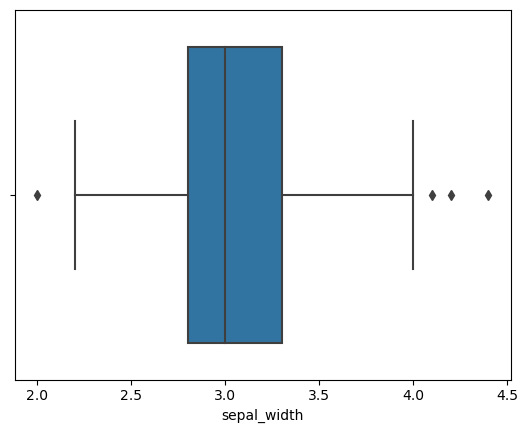

In [100]:
sns.boxplot(x=df['sepal_width'], data=df)

In [39]:
df.shape

(150, 5)

In [104]:
# IQR
Q1 = np.percentile(df['sepal_width'], 25, method = 'midpoint')
Q3 = np.percentile(df['sepal_width'], 75, method = 'midpoint')
# print(Q1,Q3)
IQR = (Q3 - Q1)
print("Old Shape: ", df.shape)
Upper = Q3+1.5*IQR
# print(Upper)
lower =  Q1-1.5*IQR  
# print(lower)
[lower,Upper]

Old Shape:  (150, 5)


[2.05, 4.05]

In [105]:
# Upper bound
max_Upper_value = np.where(df['sepal_width'] >= Upper)
print(max_Upper_value) 

(array([15, 32, 33], dtype=int64),)


In [106]:
# Lower bound
min_Lower_value = np.where(df['sepal_width'] <= lower)
print(min_Lower_value)

(array([60], dtype=int64),)


In [57]:
# df.head(35)

In [107]:
df.drop(min_Lower_value[0], inplace = True)

In [108]:
df.drop(max_Upper_value[0], inplace = True)

In [109]:
print("New Shape: ", df.shape)

New Shape:  (146, 5)


<Axes: xlabel='sepal_width'>

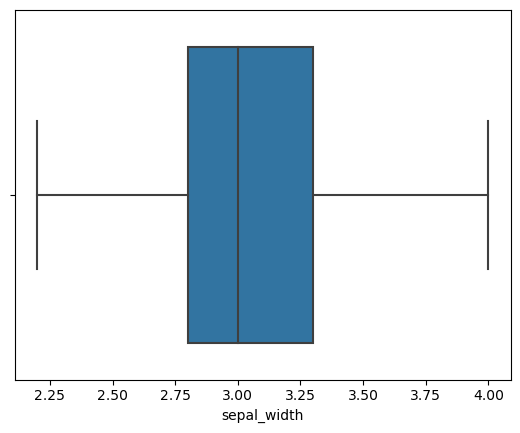

In [110]:
sns.boxplot(x='sepal_width', data=df)

<Axes: xlabel='sepal_length'>

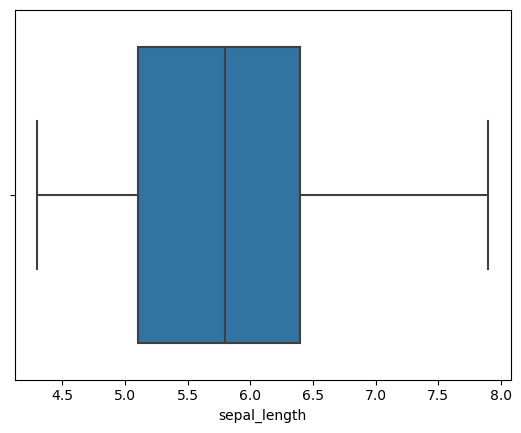

In [57]:
sns.boxplot(x='sepal_length', data=df)

<Axes: xlabel='petal_length'>

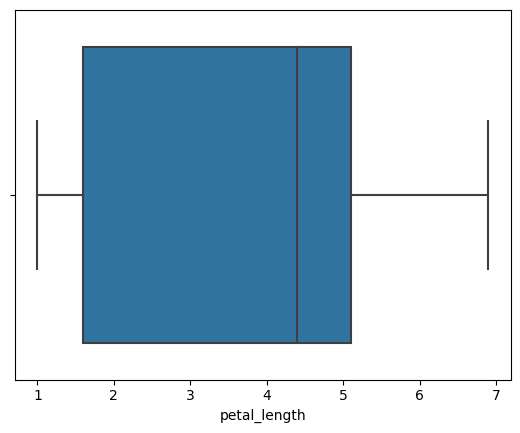

In [58]:
sns.boxplot(x='petal_length', data=df)

<Axes: xlabel='petal_width'>

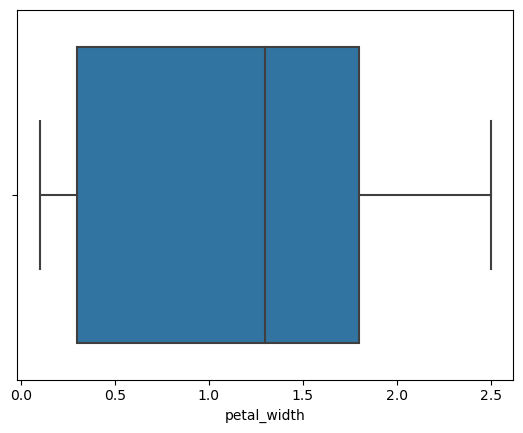

In [59]:
sns.boxplot(x='petal_width', data=df)

In [64]:
sample_df = pd.read_excel(r"C:\Users\excel\DATA Science\Datasets\Sample - Superstore.xls")
sample_df.shape

(9994, 21)

In [66]:
sample_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [67]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
